In [44]:
import pandas as pd 
import numpy  as np
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(r"C:\Users\ragul\OneDrive\Desktop\hack\AI_Revenue_Leakage_Detection\model\Telecom\dataset\telecom_billing_dataset.csv")
df

,Invoice_number,Customer_id,Service_id,Agent_id,Billing_date,Payment_status,Transaction_type,Mode_of_payment,Plan_name,Plan_category,Plan_charge,Tax_amount,Actual_amount,Billed_amount,Paid_amount,Balance_amount,Plan_start_date,Plan_end_date,Zone_area,Data_bought,Data_used,Billing_cycle,No_of_valid_days,Leakage,Anomaly_type,Type
0,INV104474,CUST006835,SVC7087,AGT107,2024-05-08,Paid,New Connection,Auto Debit,Youth Special,Prepaid,599,107.82,706.82,706.82,706.82,0.00,2024-05-06,2024-06-06,Circle-East,10,4.52,31,31,No,No anomaly,No anomaly
1,INV105891,CUST001609,SVC7741,AGT149,2025-07-04,Paid,Recharge,Cash,Business Basic,Enterprise,4999,899.82,5898.82,5898.82,5898.82,0.00,2025-07-02,2025-08-01,Circle-North,200,102.33,30,30,No,No anomaly,No anomaly
2,INV104744,CUST004433,SVC5817,AGT143,2024-01-14,Paid,Recharge,Net Banking,Smart Connect,Prepaid,699,125.82,824.82,824.82,824.82,0.00,2024-01-13,2024-02-13,Metro-A,15,2.51,31,31,No,No anomaly,No anomaly
3,INV108656,CUST005198,SVC5202,AGT008,2024-03-26,Paid,New Connection,Wallet,Industry Solution,Enterprise,9999,1799.82,11798.82,11798.82,11798.82,0.00,2024-03-21,2024-04-21,Metro-A,750,462.18,31,36,Yes,Usage mismatch,Usage mismatch
4,INV108099,CUST003653,SVC2765,AGT138,2024-02-06,Partial,Bill Payment,Auto Debit,Corporate Max,Enterprise,12999,2339.82,15338.82,15338.82,7670.37,7668.45,2024-02-01,2024-03-02,Metro-B,1000,441.01,30,30,Yes,Under payment,Under payment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,INV103796,CUST000107,SVC1669,AGT007,2024-12-09,Pending,New Connection,Wallet,Youth Special,Prepaid,599,107.82,706.82,706.82,0.00,706.82,2024-12-06,2025-01-05,Circle-West,10,7.30,30,30,No,No anomaly,No anomaly
9996,INV102282,CUST000625,SVC2168,AGT121,2025-01-09,Pending,New Connection,Cash,Family Pack,Postpaid,1499,269.82,1768.82,1768.82,0.00,1768.82,2025-01-08,2025-02-07,Circle-East,30,11.79,30,30,No,No anomaly,No anomaly
9997,INV108212,CUST000606,SVC2040,AGT032,2025-08-18,Paid,New Connection,Auto Debit,Corporate Max,Enterprise,12999,2339.82,15338.82,15338.82,15338.82,0.00,2025-08-13,2025-09-10,Metro-B,1000,509.82,28,43,Yes,Usage mismatch,Usage mismatch
9998,INV106000,CUST001785,SVC8875,AGT136,2025-08-04,Paid,Plan Change,Net Banking,Basic Starter,Prepaid,399,71.82,470.82,470.82,470.82,0.00,2025-08-02,2025-08-30,Circle-North,5,0.34,28,28,Yes,Duplicate entries,Duplicate entries


In [45]:
df.columns

Index(['Invoice_number', 'Customer_id', 'Service_id', 'Agent_id',
       'Billing_date', 'Payment_status', 'Transaction_type', 'Mode_of_payment',
       'Plan_name', 'Plan_category', 'Plan_charge', 'Tax_amount',
       'Actual_amount', 'Billed_amount', 'Paid_amount', 'Balance_amount',
       'Plan_start_date', 'Plan_end_date', 'Zone_area', 'Data_bought',
       'Data_used', 'Billing_cycle', 'No_of_valid_days', 'Leakage',
       'Anomaly_type', 'Type'],
      dtype='object')

In [46]:
df.shape

(10000, 26)

In [47]:
df.dtypes

Invoice_number       object
Customer_id          object
Service_id           object
Agent_id             object
Billing_date         object
Payment_status       object
Transaction_type     object
Mode_of_payment      object
Plan_name            object
Plan_category        object
Plan_charge           int64
Tax_amount          float64
Actual_amount       float64
Billed_amount       float64
Paid_amount         float64
Balance_amount      float64
Plan_start_date      object
Plan_end_date        object
Zone_area            object
Data_bought           int64
Data_used           float64
Billing_cycle         int64
No_of_valid_days      int64
Leakage              object
Anomaly_type         object
Type                 object
dtype: object

In [48]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Invoice_number
['INV104474' 'INV105891' 'INV104744' ... 'INV102282' 'INV108212'
 'INV106603']

Column: Customer_id
['CUST006835' 'CUST001609' 'CUST004433' ... 'CUST000107' 'CUST000625'
 'CUST001785']

Column: Service_id
['SVC7087' 'SVC7741' 'SVC5817' ... 'SVC9068' 'SVC7136' 'SVC2168']

Column: Agent_id
['AGT107' 'AGT149' 'AGT143' 'AGT008' 'AGT138' 'AGT075' 'AGT113' 'AGT005'
 'AGT035' 'AGT037' 'AGT144' 'AGT069' 'AGT115' 'AGT051' 'AGT148' 'AGT076'
 'AGT102' 'AGT078' 'AGT090' 'AGT027' 'AGT020' 'AGT057' 'AGT091' 'AGT015'
 'AGT071' 'AGT109' 'AGT097' 'AGT004' 'AGT010' 'AGT014' 'AGT021' 'AGT072'
 'AGT082' 'AGT093' 'AGT088' 'AGT040' 'AGT065' 'AGT087' 'AGT060' 'AGT022'
 'AGT025' 'AGT110' 'AGT003' 'AGT146' 'AGT129' 'AGT032' 'AGT079' 'AGT047'
 'AGT049' 'AGT099' 'AGT132' 'AGT123' 'AGT038' 'AGT150' 'AGT094' 'AGT054'
 'AGT042' 'AGT147' 'AGT086' 'AGT066' 'AGT131' 'AGT056' 'AGT070' 'AGT128'
 'AGT059' 'AGT050' 'AGT126' 'AGT024' 'AGT013' 'AGT119' 'AGT085' 'AGT145'
 'AGT043' 'AGT096' 'AGT101' 'A

In [49]:
for col in df.select_dtypes(include=['number']).columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Plan_charge
[  599  4999   699  9999 12999  1999  2999  1499  7999  1299   999   399
  2499  3999]

Column: Tax_amount
[ 107.82  899.82  125.82 1799.82 2339.82  359.82  539.82  269.82 1439.82
  233.82  179.82   71.82  449.82  719.82]

Column: Actual_amount
[  706.82  5898.82   824.82 11798.82 15338.82  2358.82  3538.82  1768.82
  9438.82  1532.82  1178.82   470.82  2948.82  4718.82]

Column: Billed_amount
[  706.82  5898.82   824.82 11798.82 15338.82  2358.82  3538.82  1768.82
  9438.82  1532.82  1178.82   470.82  2613.78  7817.11  2948.82  4718.82
  6055.81  8135.97  5938.32  4219.36 16562.6   2076.73  4314.79  7833.64
   564.5   5186.67  1912.07  8557.91  8654.66  3433.95   468.95   952.05
  6198.11  1337.43  2113.95  5794.75 20688.03  1765.13 12163.09   770.17
 20593.07  1004.73  3465.13  1042.59   961.7   4258.76   288.09   914.06
   448.98  2499.9   8741.06  4115.85 11939.69  2139.6  14456.09  2661.94
  4427.78  3263.76  3504.2    295.05  4631.67  1673.49  1213.96  6008.2

In [50]:
df.isnull().sum()

Invoice_number      0
Customer_id         0
Service_id          0
Agent_id            0
Billing_date        0
Payment_status      0
Transaction_type    0
Mode_of_payment     0
Plan_name           0
Plan_category       0
Plan_charge         0
Tax_amount          0
Actual_amount       0
Billed_amount       0
Paid_amount         0
Balance_amount      0
Plan_start_date     0
Plan_end_date       0
Zone_area           0
Data_bought         0
Data_used           0
Billing_cycle       0
No_of_valid_days    0
Leakage             0
Anomaly_type        0
Type                0
dtype: int64

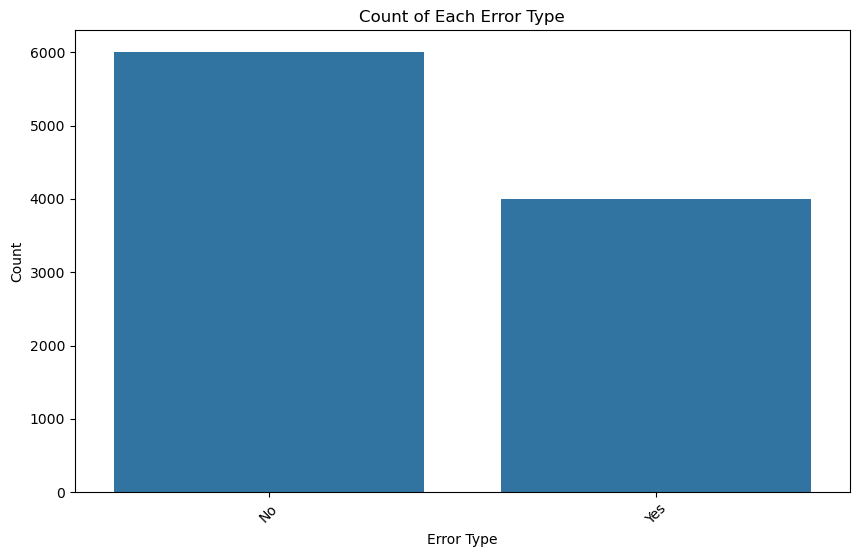

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Leakage', order=df['Leakage'].value_counts().index)
plt.title("Count of Each Error Type")
plt.xlabel("Error Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()

In [53]:
df['Leakage'].value_counts()

Leakage
No     6000
Yes    4000
Name: count, dtype: int64

In [54]:
df.shape

(10000, 26)

In [59]:
# Loop through each unique value in Service column and display rows
unique_services = df['Anomaly_type'].unique()
pd.set_option('display.max_columns', None)

for service in unique_services:
    print(f"\n===== Rows for Service: {service} =====\n")
    display(df[df['Anomaly_type'] == service].head())  # show first few rows for each service



===== Rows for Service: No anomaly =====



,Invoice_number,Customer_id,Service_id,Agent_id,Billing_date,Payment_status,Transaction_type,Mode_of_payment,Plan_name,Plan_category,Plan_charge,Tax_amount,Actual_amount,Billed_amount,Paid_amount,Balance_amount,Plan_start_date,Plan_end_date,Zone_area,Data_bought,Data_used,Billing_cycle,No_of_valid_days,Leakage,Anomaly_type,Type,Days_Difference
0,INV104474,CUST006835,SVC7087,AGT107,2024-05-08,Paid,New Connection,Auto Debit,Youth Special,Prepaid,599,107.82,706.82,706.82,706.82,0.0,2024-05-06,2024-06-06,Circle-East,10,4.52,31,31,No,No anomaly,No anomaly,31
1,INV105891,CUST001609,SVC7741,AGT149,2025-07-04,Paid,Recharge,Cash,Business Basic,Enterprise,4999,899.82,5898.82,5898.82,5898.82,0.0,2025-07-02,2025-08-01,Circle-North,200,102.33,30,30,No,No anomaly,No anomaly,30
2,INV104744,CUST004433,SVC5817,AGT143,2024-01-14,Paid,Recharge,Net Banking,Smart Connect,Prepaid,699,125.82,824.82,824.82,824.82,0.0,2024-01-13,2024-02-13,Metro-A,15,2.51,31,31,No,No anomaly,No anomaly,31
5,INV104090,CUST000951,SVC3575,AGT075,2023-11-10,Paid,Bill Payment,UPI,Premium Plus,Postpaid,1999,359.82,2358.82,2358.82,2358.82,0.0,2023-11-07,2023-12-07,Circle-North,50,34.36,30,30,No,No anomaly,No anomaly,30
6,INV104424,CUST003428,SVC1098,AGT113,2023-11-02,Paid,Renewal,Credit Card,Corporate Max,Enterprise,12999,2339.82,15338.82,15338.82,15338.82,0.0,2023-11-01,2023-11-29,Circle-South,1000,794.24,28,28,No,No anomaly,No anomaly,28



===== Rows for Service: Usage mismatch =====



,Invoice_number,Customer_id,Service_id,Agent_id,Billing_date,Payment_status,Transaction_type,Mode_of_payment,Plan_name,Plan_category,Plan_charge,Tax_amount,Actual_amount,Billed_amount,Paid_amount,Balance_amount,Plan_start_date,Plan_end_date,Zone_area,Data_bought,Data_used,Billing_cycle,No_of_valid_days,Leakage,Anomaly_type,Type,Days_Difference
3,INV108656,CUST005198,SVC5202,AGT008,2024-03-26,Paid,New Connection,Wallet,Industry Solution,Enterprise,9999,1799.82,11798.82,11798.82,11798.82,0.0,2024-03-21,2024-04-21,Metro-A,750,462.18,31,36,Yes,Usage mismatch,Usage mismatch,31
95,INV108742,CUST007384,SVC2070,AGT136,2025-03-14,Paid,New Connection,UPI,Enterprise Pro,Enterprise,7999,1439.82,9438.82,9438.82,9438.82,0.0,2025-03-10,2025-04-07,Circle-South,500,138.61,28,27,Yes,Usage mismatch,Usage mismatch,28
98,INV108425,CUST004233,SVC4972,AGT087,2024-01-02,Paid,New Connection,Wallet,Youth Special,Prepaid,599,107.82,706.82,706.82,706.82,0.0,2023-12-30,2024-01-30,Circle-East,10,5.88,31,38,Yes,Usage mismatch,Usage mismatch,31
113,INV108788,CUST000993,SVC5191,AGT107,2024-11-14,Paid,Renewal,Debit Card,Family Pack,Postpaid,1499,269.82,1768.82,1768.82,1768.82,0.0,2024-11-09,2024-12-07,Circle-West,30,26.99,28,37,Yes,Usage mismatch,Usage mismatch,28
119,INV108776,CUST001458,SVC4986,AGT109,2024-08-10,Paid,Renewal,Auto Debit,Data Booster,Prepaid,999,179.82,1178.82,1178.82,1178.82,0.0,2024-08-05,2024-09-02,Circle-East,25,23.21,28,41,Yes,Usage mismatch,Usage mismatch,28



===== Rows for Service: Under payment =====



,Invoice_number,Customer_id,Service_id,Agent_id,Billing_date,Payment_status,Transaction_type,Mode_of_payment,Plan_name,Plan_category,Plan_charge,Tax_amount,Actual_amount,Billed_amount,Paid_amount,Balance_amount,Plan_start_date,Plan_end_date,Zone_area,Data_bought,Data_used,Billing_cycle,No_of_valid_days,Leakage,Anomaly_type,Type,Days_Difference
4,INV108099,CUST003653,SVC2765,AGT138,2024-02-06,Partial,Bill Payment,Auto Debit,Corporate Max,Enterprise,12999,2339.82,15338.82,15338.82,7670.37,7668.45,2024-02-01,2024-03-02,Metro-B,1000,441.01,30,30,Yes,Under payment,Under payment,30
26,INV107914,CUST000945,SVC2447,AGT015,2024-04-18,Partial,New Connection,Net Banking,Basic Starter,Prepaid,399,71.82,470.82,470.82,274.30,196.52,2024-04-14,2024-05-14,Circle-North,5,3.96,30,30,Yes,Under payment,Under payment,30
36,INV107509,CUST007134,SVC9568,AGT093,2025-05-30,Partial,New Connection,Auto Debit,Basic Starter,Prepaid,399,71.82,470.82,470.82,306.18,164.64,2025-05-28,2025-06-25,Circle-North,5,3.61,28,28,Yes,Under payment,Under payment,28
40,INV107765,CUST002719,SVC2153,AGT035,2025-04-20,Partial,Renewal,UPI,Premium Plus,Postpaid,1999,359.82,2358.82,2358.82,1301.53,1057.29,2025-04-16,2025-05-16,Circle-East,50,6.55,30,30,Yes,Under payment,Under payment,30
41,INV107455,CUST007304,SVC2328,AGT065,2025-04-28,Partial,Bill Payment,Debit Card,Data Booster,Prepaid,999,179.82,1178.82,1178.82,1050.05,128.77,2025-04-27,2025-05-25,Metro-B,25,0.13,28,28,Yes,Under payment,Under payment,28



===== Rows for Service: Extra data usage =====



,Invoice_number,Customer_id,Service_id,Agent_id,Billing_date,Payment_status,Transaction_type,Mode_of_payment,Plan_name,Plan_category,Plan_charge,Tax_amount,Actual_amount,Billed_amount,Paid_amount,Balance_amount,Plan_start_date,Plan_end_date,Zone_area,Data_bought,Data_used,Billing_cycle,No_of_valid_days,Leakage,Anomaly_type,Type,Days_Difference
7,INV109371,CUST000178,SVC7120,AGT005,2024-10-05,Paid,Bill Payment,Credit Card,Corporate Max,Enterprise,12999,2339.82,15338.82,15338.82,15338.82,0.0,2024-10-01,2024-10-29,Circle-North,1000,1104.91,28,28,Yes,Extra data usage,Extra data usage,28
8,INV108898,CUST000293,SVC8514,AGT035,2024-08-14,Paid,Bill Payment,UPI,Business Basic,Enterprise,4999,899.82,5898.82,5898.82,5898.82,0.0,2024-08-13,2024-09-13,Circle-East,200,495.21,31,31,Yes,Extra data usage,Extra data usage,31
37,INV109316,CUST000779,SVC4280,AGT088,2025-01-20,Paid,Bill Payment,Credit Card,Data Booster,Prepaid,999,179.82,1178.82,1178.82,1178.82,0.0,2025-01-19,2025-02-19,Circle-East,25,36.19,31,31,Yes,Extra data usage,Extra data usage,31
47,INV109046,CUST000863,SVC1469,AGT003,2024-06-21,Paid,Plan Change,Debit Card,Business Pro,Postpaid,2999,539.82,3538.82,3538.82,3538.82,0.0,2024-06-18,2024-07-18,Metro-A,100,172.61,30,30,Yes,Extra data usage,Extra data usage,30
48,INV108965,CUST002284,SVC3355,AGT037,2024-11-12,Paid,Renewal,Net Banking,Youth Special,Prepaid,599,107.82,706.82,706.82,706.82,0.0,2024-11-10,2024-12-08,Circle-East,10,18.46,28,28,Yes,Extra data usage,Extra data usage,28



===== Rows for Service: Duplicate entries =====



,Invoice_number,Customer_id,Service_id,Agent_id,Billing_date,Payment_status,Transaction_type,Mode_of_payment,Plan_name,Plan_category,Plan_charge,Tax_amount,Actual_amount,Billed_amount,Paid_amount,Balance_amount,Plan_start_date,Plan_end_date,Zone_area,Data_bought,Data_used,Billing_cycle,No_of_valid_days,Leakage,Anomaly_type,Type,Days_Difference
12,INV106000,CUST002459,SVC3832,AGT069,2023-10-02,Paid,Renewal,Debit Card,Family Pack,Postpaid,1499,269.82,1768.82,1768.82,1768.82,0.0,2023-09-30,2023-10-31,Metro-A,30,25.46,31,31,Yes,Duplicate entries,Duplicate entries,31
68,INV106000,CUST002923,SVC7035,AGT147,2025-03-22,Paid,Plan Change,UPI,Premium Plus,Postpaid,1999,359.82,2358.82,2358.82,2358.82,0.0,2025-03-19,2025-04-16,Metro-A,50,43.25,28,28,Yes,Duplicate entries,Duplicate entries,28
92,INV106000,CUST005223,SVC1907,AGT101,2024-11-18,Paid,New Connection,Wallet,Travel Pack,Prepaid,1299,233.82,1532.82,1532.82,1532.82,0.0,2024-11-13,2024-12-14,Rural-Zone,40,23.85,31,31,Yes,Duplicate entries,Duplicate entries,31
109,INV106000,CUST004790,SVC7662,AGT040,2025-05-02,Paid,Plan Change,UPI,Enterprise Pro,Enterprise,7999,1439.82,9438.82,9438.82,9438.82,0.0,2025-04-30,2025-05-31,Circle-North,500,133.33,31,31,Yes,Duplicate entries,Duplicate entries,31
150,INV106000,CUST005530,SVC4418,AGT018,2025-06-25,Paid,Bill Payment,Auto Debit,Family Pack,Postpaid,1499,269.82,1768.82,1768.82,1768.82,0.0,2025-06-23,2025-07-21,Circle-East,30,22.91,28,28,Yes,Duplicate entries,Duplicate entries,28



===== Rows for Service: Excess payment =====



,Invoice_number,Customer_id,Service_id,Agent_id,Billing_date,Payment_status,Transaction_type,Mode_of_payment,Plan_name,Plan_category,Plan_charge,Tax_amount,Actual_amount,Billed_amount,Paid_amount,Balance_amount,Plan_start_date,Plan_end_date,Zone_area,Data_bought,Data_used,Billing_cycle,No_of_valid_days,Leakage,Anomaly_type,Type,Days_Difference
14,INV107256,CUST002455,SVC8032,AGT051,2023-11-04,Paid,Plan Change,UPI,Youth Special,Prepaid,599,107.82,706.82,706.82,949.11,-242.29,2023-10-31,2023-11-28,Circle-West,10,2.45,28,28,Yes,Excess payment,Excess payment,28
16,INV106973,CUST002628,SVC6873,AGT076,2025-03-10,Paid,Plan Change,Debit Card,Family Pack,Postpaid,1499,269.82,1768.82,1768.82,2061.32,-292.50,2025-03-08,2025-04-05,Circle-West,30,5.96,28,28,Yes,Excess payment,Excess payment,28
50,INV107207,CUST000833,SVC2805,AGT037,2023-11-26,Paid,New Connection,Credit Card,Smart Connect,Prepaid,699,125.82,824.82,824.82,1310.46,-485.64,2023-11-24,2023-12-25,Circle-North,15,11.04,31,31,Yes,Excess payment,Excess payment,31
56,INV107090,CUST006288,SVC2143,AGT049,2025-03-25,Paid,Bill Payment,Auto Debit,Business Basic,Enterprise,4999,899.82,5898.82,5898.82,6895.31,-996.49,2025-03-23,2025-04-20,Circle-South,200,127.98,28,28,Yes,Excess payment,Excess payment,28
57,INV107284,CUST007118,SVC4459,AGT099,2023-09-18,Paid,Plan Change,Debit Card,Corporate Max,Enterprise,12999,2339.82,15338.82,15338.82,18682.53,-3343.71,2023-09-14,2023-10-12,Circle-East,1000,907.25,28,28,Yes,Excess payment,Excess payment,28



===== Rows for Service: Missing charges =====



,Invoice_number,Customer_id,Service_id,Agent_id,Billing_date,Payment_status,Transaction_type,Mode_of_payment,Plan_name,Plan_category,Plan_charge,Tax_amount,Actual_amount,Billed_amount,Paid_amount,Balance_amount,Plan_start_date,Plan_end_date,Zone_area,Data_bought,Data_used,Billing_cycle,No_of_valid_days,Leakage,Anomaly_type,Type,Days_Difference
28,INV106635,CUST004084,SVC1044,AGT109,2025-06-02,Paid,Recharge,UPI,Family Pack,Postpaid,1499,269.82,1768.82,2613.78,2613.78,0.0,2025-05-29,2025-06-28,Metro-A,30,1.60,30,30,Yes,Missing charges,Missing charges,30
39,INV106226,CUST007669,SVC2303,AGT027,2024-09-02,Paid,New Connection,Debit Card,Business Basic,Enterprise,4999,899.82,5898.82,7817.11,7817.11,0.0,2024-08-28,2024-09-28,Metro-A,200,153.25,31,31,Yes,Missing charges,Missing charges,31
80,INV106040,CUST006268,SVC4761,AGT050,2024-11-20,Paid,Renewal,Net Banking,Enterprise Pro,Enterprise,7999,1439.82,9438.82,6055.81,6055.81,0.0,2024-11-16,2024-12-14,Circle-North,500,291.70,28,28,Yes,Missing charges,Missing charges,28
81,INV106582,CUST002401,SVC8035,AGT126,2025-01-27,Paid,New Connection,UPI,Enterprise Pro,Enterprise,7999,1439.82,9438.82,8135.97,8135.97,0.0,2025-01-23,2025-02-22,Metro-A,500,361.77,30,30,Yes,Missing charges,Missing charges,30
86,INV106652,CUST001170,SVC4795,AGT102,2024-12-25,Paid,Bill Payment,Credit Card,Corporate Elite,Postpaid,3999,719.82,4718.82,5938.32,5938.32,0.0,2024-12-24,2025-01-21,Circle-South,150,39.19,28,28,Yes,Missing charges,Missing charges,28


In [58]:
# Convert columns to datetime
df['Plan_start_date'] = pd.to_datetime(df['Plan_start_date'])
df['Plan_end_date'] = pd.to_datetime(df['Plan_end_date'])

# Calculate difference in days
df['Days_Difference'] = (df['Plan_end_date'] - df['Plan_start_date']).dt.days

# Check result
print(df[['Plan_start_date', 'Plan_end_date', 'Days_Difference']].head())

  Plan_start_date Plan_end_date  Days_Difference
0      2024-05-06    2024-06-06               31
1      2025-07-02    2025-08-01               30
2      2024-01-13    2024-02-13               31
3      2024-03-21    2024-04-21               31
4      2024-02-01    2024-03-02               30
